# Scraping Using Tweepy

In [ ]:
# install Tweepy
!pip install tweepy

# Imports
import tweepy
import pandas as pd
import time

In [ ]:
from tweepy import Stream

In [ ]:
# Authorization
consumer_key = "u6F1ce2L8yP1479L6V94G5PB6"
consumer_secret = "rDxiteQPLHPDy3QgEW7Iuxnfm7j6oEHFzIX8LZK8hFx0lD1ug8"
access_token = "1151827777772896256-ya4m6z6Ht4OwnQGCYwEwbRXVsnKy9S"
access_token_secret = "FeHjO533Bl8kphOwFlRCx8n02Og7iXAqP0vj24M5CwmQE"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
from tweepy.streaming import StreamListener
import time

class SListener(StreamListener):
    def __init__(self, api = None):
        self.output = open('tweets_%s.json'%
                           time.strftime('%Y%m%d-%H%M%S'), 'w')
        self.api = api or API()

In [ ]:
# Set up words to track
keywords_to_track = ['#ไปรษณีย์ไทย']

# Instantiate the SListener object 
listen = SListener(api)

# Instantiate the Stream object
stream = Stream(auth, listen)

# Begin collecting data
stream.filter(track = keywords_to_track)

KeyboardInterrupt: ignored

In [ ]:
import datetime

In [ ]:
# setting datetime
today = datetime.datetime.now()
today = today.replace(hour=23, minute=59, second=59, microsecond=999999) # set from the beggining of the day
time_to_the_past = 1 # 1 because we want 1 day before today
yesterday = today - datetime.timedelta(time_to_the_past) 

In [ ]:
# Collecting tweets
count = 10 # Set the number of tweets to retrieve
next_day = yesterday + datetime.timedelta(time_to_the_past) # equivalent to today
tweets = tweepy.Cursor(api.search,
                               q="from:maldito_bulo",
                               lang="es",
                               tweet_mode='extended',
                               until = next_day.date() # format YYYY-MM-DD in datetime. Not string. Twitter only extract tweets before that date
                               ).items(count)

In [ ]:
tweets_list = []
for tweet in tweets:
            # Filtering by date
            if  yesterday.date() == tweet.created_at.date(): # here we take only tweets from the same date as yesterday in format YYYY-MM-DD
                # Accessing to full_text is different between RT and normal tweet
                if 'retweeted_status' in tweet._json:  # if it is a RT take full_text
                    full_text = tweet._json['retweeted_status']['full_text']
                else:  # if it is a normal tweet take the full_text
                    full_text = tweet.full_text

                 tweets_list.append([tweet.user.screen_name, tweet.id, full_text, tweet.user.verified, str(tweet.created_at.date()), tweet.user.location, tweet.user.url, tweet.entities])

IndentationError: ignored

In [ ]:
text_query = 'ไปรษณีย์ไทย'
count = 150
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [ ]:
tweets_df

,0,1,2
0,2022-02-16 04:55:26,1493811232129777665,เบอร์นี้โทรมา บอกเป็นไปรษณีย์ไทย ให้กด9 พอกด9ไ...
1,2022-02-16 04:54:14,1493810933856374784,@TSererak เมื่อวานเลยค่ะ​ สดๆ​ร้อนๆ​ บอกโทรมาจ...
2,2022-02-16 04:32:19,1493805417574502403,รับจ้างทำการบ้าน รับงานเร่ง ❇️( รับส่งทางไปรษณ...
3,2022-02-16 04:31:46,1493805278948917251,RT @TOOKTAJANG: เราไม่ โกง นะคะ เลขพัสดุ ก็บอก...
4,2022-02-16 04:29:40,1493804751565520896,RT @JustaimXIII_ART: [PLS RE]✨\nอเอมเปิดCOMMIS...
...,...,...,...
145,2022-02-15 13:37:08,1493580137241014273,RT @septamberwish: มิจฉาชีพโทรมาเมื่อกี้\nมัน:...
146,2022-02-15 13:34:56,1493579584142405633,RT @Thailand_Post: รู้ทันมิจฉาชีพ อย่าหลงเชื่อ...
147,2022-02-15 13:34:45,1493579536927432707,สวัสดีค่า เลขแทรค 15/2 มาแล้วค่ะ 📩☁️\n\n♡ ใช้ข...
148,2022-02-15 13:33:47,1493579293581971460,RT @Thailand_Post: รู้ทันมิจฉาชีพ อย่าหลงเชื่อ...


# Scraping Using Snscrape

# only content

In [ ]:
!pip install -q snscrape==0.3.4

In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
end_date = '2019-12-31'

In [ ]:
search_term = 'ไปรษณีย์ไทย'
from_date = '2019-01-01'

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 260


In [ ]:
max_results = 5

In [ ]:
extracted_tweets = "snscrape --format '{date}|{content!r}|{likeCount!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

No Tweets found


In [ ]:
df

,content
0,2019-12-30 23:50:22+00:00|'ไปรษณีย์ไทย ชวนทำบุ...
1,2019-12-30 23:48:26+00:00|'ไปรษณีย์ไทย ชวนทำบุ...
2,2019-12-30 22:08:20+00:00|'ไปรษณีย์ไทย ชวนคนไท...
3,2019-12-30 18:48:20+00:00|'ไปรษณีย์ไทย ชวนทำบุ...
4,2019-12-30 18:40:22+00:00|'รอนานๆก็อาจจะบั่นทอ...


# no engagement

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list = []

max = 20000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('ไปรษณีย์ไทย since:2019-01-01 until:2019-12-31').get_items()):
    if i>max:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username, tweet.url, ])

In [ ]:
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'URL'])

In [ ]:
tweets_df

,Datetime,Tweet Id,Text,Username,URL
0,2019-12-30 08:56:41+00:00,1211571800653455360,ส่งวันศุกร์ วันจันทร์ยังไม่ได้ แล้วใช้ 31เอาไง...,_pptng,https://twitter.com/_pptng/status/121157180065...
1,2019-12-30 08:32:43+00:00,1211565769630212096,ลืมว่าเขตบ้านกุมันห่วยเพราะไม่เคยใช้บริการนานแ...,2richcocoa,https://twitter.com/2richcocoa/status/12115657...
2,2019-12-30 08:15:00+00:00,1211561308098908160,ปณท เผยผลสำรวจคนไทยเชื่อมั่นแบรนด์ 80%\n#ไปรษณ...,Thansettakij,https://twitter.com/Thansettakij/status/121156...
3,2019-12-30 07:05:28+00:00,1211543812125782016,📌รับสมัครคนช่วยคอนเฟิร์มออเดอร์\n📌รายได้สัปดาห...,jobjob90813167,https://twitter.com/jobjob90813167/status/1211...
4,2019-12-30 04:55:06+00:00,1211511001968869378,มาค่ะมีเรื่องให้กรี๊ดทุกรอบที่ใช้บริการ รอบนี้...,Duckky_teuk,https://twitter.com/Duckky_teuk/status/1211511...
...,...,...,...,...,...
4324,2019-01-02 08:47:06+00:00,1080384980625195009,#ไปรษณีย์ไทย จับมือธนาคารไทยพาณิชย์ ให้บริการร...,Thailand_Post,https://twitter.com/Thailand_Post/status/10803...
4325,2019-01-02 07:37:20+00:00,1080367421771272192,กราบพี่ไปร ส่งเช้าได้ของบ่ายย เร็วกว่าเคอรี่ไป...,cobaltcappa,https://twitter.com/cobaltcappa/status/1080367...
4326,2019-01-01 04:57:35+00:00,1079964831871102976,ไปรษณีย์ไทยชวนใช้ “iBox” สะดวกรับพัสดุ 24 ชม. ...,TheReporterAsia,https://twitter.com/TheReporterAsia/status/107...
4327,2019-01-01 04:57:07+00:00,1079964713017008128,ไปรษณีย์ไทย *ลดค่าส่ง* EMS\nสำหรับพัสดุ 3 ถึง ...,goodsalebox,https://twitter.com/goodsalebox/status/1079964...


# Explore

In [ ]:
import pandas as pd

In [ ]:
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/unclean/twt2021.csv')

In [ ]:
df2019.head()

,Unnamed: 0,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,lang,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,2019-12-30 08:56:41+00:00,1211571800653455360,ส่งวันศุกร์ วันจันทร์ยังไม่ได้ แล้วใช้ 31เอาไง...,https://twitter.com/_pptng/status/121157180065...,_pptng,125,1,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'ปณ']",NaN
1,1,2019-12-30 08:32:43+00:00,1211565769630212096,ลืมว่าเขตบ้านกุมันห่วยเพราะไม่เคยใช้บริการนานแ...,https://twitter.com/2richcocoa/status/12115657...,2richcocoa,56,1,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'EMS', 'ศปศรีราชา', 'ไปรษณีย์อ...",NaN
2,2,2019-12-30 08:15:00+00:00,1211561308098908160,ปณท เผยผลสำรวจคนไทยเชื่อมั่นแบรนด์ 80%\n#ไปรษณ...,https://twitter.com/Thansettakij/status/121156...,Thansettakij,334774,0,1,1,0,th,['https://www.thansettakij.com/content/tech/41...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'โลจิสติกส์', 'ฐานเศรษฐกิจ']",NaN
3,3,2019-12-30 07:05:28+00:00,1211543812125782016,📌รับสมัครคนช่วยคอนเฟิร์มออเดอร์\n📌รายได้สัปดาห...,https://twitter.com/jobjob90813167/status/1211...,jobjob90813167,1,0,0,0,0,th,NaN,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tenlee_1001', 'howtoทิ้ง', 'GOT7KEEPSPININGi...",NaN
4,4,2019-12-30 04:55:06+00:00,1211511001968869378,มาค่ะมีเรื่องให้กรี๊ดทุกรอบที่ใช้บริการ รอบนี้...,https://twitter.com/Duckky_teuk/status/1211511...,Duckky_teuk,564,1,0,0,0,th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย'],NaN


In [ ]:
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/unclean/tweets2021.csv')
df2021.head()

,Unnamed: 0,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,lang,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,2021-12-30 09:30:00+00:00,1476485712937693189,ข่าวปลอม อย่าแชร์! ❌ เบอร์โทรศัพท์ของไปรษณีย์ ...,https://twitter.com/AFNCThailand/status/147648...,AFNCThailand,13409,0,9,3,0,th,['https://bit.ly/34dddAx'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ข่าวปลอม', 'ศูนย์ต่อต้านข่าวปลอม', 'AntiFake...",NaN
1,1,2021-12-30 06:30:47+00:00,1476440611775717376,왔다!! 이렇게나 빨리오다니??!\n언능 집에 가고싶다ㅋㅋ\n춥겠지만 조금만 기다려...,https://twitter.com/sinbieun78/status/14764406...,sinbieun78,34,3,79,66,1,ko,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['บาสเด็กอ้วนที่แท้จริง', 'ไปรษณีย์ไทย', 'Thai...",NaN
2,2,2021-12-29 12:10:45+00:00,1476163778924269573,บริษัท ไปรษณีย์ไทย จำกัด แจ้งเปิดให้บริการเฉพา...,https://twitter.com/SupCav12/status/1476163778...,SupCav12,255,0,1,1,0,th,['http://bit.ly/3ex1xuk'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['สายด่วน1111', 'ไปรษณีย์ไทย']",NaN
3,3,2021-12-29 11:49:38+00:00,1476158464661417986,""" ไปรษณีย์ไทยแจ้งมาตามนี้ค่ะ ""\n\nพี่ไปรฯ แจ้ง...",https://twitter.com/janjanjanpalit/status/1476...,janjanjanpalit,59,0,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,"Coordinates(longitude=100.496344, latitude=13....","Place(fullName='Rat Burana, Thailand', name='R...","['Cr', 'ไปรษณีย์ไทย', 'ส่งพลังสร้างสัมพันธ์']",NaN
4,4,2021-12-29 09:22:02+00:00,1476121318554701825,พี่ไปรฯ แจ้งเตือน!! อย่าหลงเชื่อกลโกงมิจฉาชีพแ...,https://twitter.com/Thailand_Post/status/14761...,Thailand_Post,21308,2,790,91,5,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'ส่งพลังสร้างสัมพันธ์']",NaN


In [ ]:
df2021.count()

Column1               1412
publishedDate         1412
tweet_id              1412
text                  1412
pos_neg               1404
username              1412
user_followerCount    1412
replyCount            1412
retweetCount          1412
likeCount             1412
quoteCount            1412
outlinks                38
media                  683
quotedTweet             31
mentionedUsers         289
hashtags              1412
dtype: int64

In [ ]:
df2021.drop(columns=['retweetedTweet'], inplace=True)

In [ ]:
df2021.columns

Index(['Column1', 'publishedDate', 'tweet_id', 'text', 'url', 'username',
       'user_followerCount', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'outlinks', 'media', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'place', 'hashtags'],
      dtype='object')

In [ ]:
df2021.shape

(3262, 23)

In [ ]:
temp1 = df2021[df2021['username'].str.contains('Thailand_Post')].copy()
temp1.shape

(536, 23)

In [ ]:
df2021['username_ไปร'] = ~df2021['username'].str.contains('Thailand_Post')
df2021['username_ไปร']

0        True
1        True
2        True
3        True
4       False
        ...  
3257     True
3258     True
3259     True
3260     True
3261    False
Name: username_ไปร, Length: 3262, dtype: bool

In [ ]:
df2021.drop(columns=['username'])

,Unnamed: 0,publishedDate,tweet_id,text,url,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,lang,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,username_ไปร
0,0,2021-12-30 09:30:00+00:00,1476485712937693189,ข่าวปลอม อย่าแชร์! ❌ เบอร์โทรศัพท์ของไปรษณีย์ ...,https://twitter.com/AFNCThailand/status/147648...,13409,0,9,3,0,th,['https://bit.ly/34dddAx'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ข่าวปลอม', 'ศูนย์ต่อต้านข่าวปลอม', 'AntiFake...",NaN,True
1,1,2021-12-30 06:30:47+00:00,1476440611775717376,왔다!! 이렇게나 빨리오다니??!\n언능 집에 가고싶다ㅋㅋ\n춥겠지만 조금만 기다려...,https://twitter.com/sinbieun78/status/14764406...,34,3,79,66,1,ko,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['บาสเด็กอ้วนที่แท้จริง', 'ไปรษณีย์ไทย', 'Thai...",NaN,True
2,2,2021-12-29 12:10:45+00:00,1476163778924269573,บริษัท ไปรษณีย์ไทย จำกัด แจ้งเปิดให้บริการเฉพา...,https://twitter.com/SupCav12/status/1476163778...,255,0,1,1,0,th,['http://bit.ly/3ex1xuk'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['สายด่วน1111', 'ไปรษณีย์ไทย']",NaN,True
3,3,2021-12-29 11:49:38+00:00,1476158464661417986,""" ไปรษณีย์ไทยแจ้งมาตามนี้ค่ะ ""\n\nพี่ไปรฯ แจ้ง...",https://twitter.com/janjanjanpalit/status/1476...,59,0,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,"Coordinates(longitude=100.496344, latitude=13....","Place(fullName='Rat Burana, Thailand', name='R...","['Cr', 'ไปรษณีย์ไทย', 'ส่งพลังสร้างสัมพันธ์']",NaN,True
4,4,2021-12-29 09:22:02+00:00,1476121318554701825,พี่ไปรฯ แจ้งเตือน!! อย่าหลงเชื่อกลโกงมิจฉาชีพแ...,https://twitter.com/Thailand_Post/status/14761...,21308,2,790,91,5,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'ส่งพลังสร้างสัมพันธ์']",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,3257,2021-01-02 12:04:22+00:00,1345340154693619713,กุส่งของขวัญให้เพื่อนปีใหม่ ส่งทั้งหมด9ซอง ถึ...,https://twitter.com/SaiiYC16/status/1345340154...,789,0,0,0,0,th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย'],NaN,True
3258,3258,2021-01-02 09:52:27+00:00,1345306955020001280,@Thailand_Post ถ้าเขียนคำว่า Happy New Year 20...,https://twitter.com/pancystr/status/1345306955...,613,3,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,NaN,['ไปรษณีย์ไทย'],NaN,True
3259,3259,2021-01-02 08:21:01+00:00,1345283944510496769,ยังไงกันแน่ พัสดุส่งแบบใส่กระบอกส่งทุกครั้งก็ค...,https://twitter.com/mybaby9394/status/13452839...,33,0,0,0,0,th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย'],NaN,True
3260,3260,2021-01-02 04:39:08+00:00,1345228105015721984,ไม่โทรเลย แต่ออกใบเเจ้งงงมาก เราก็รอจะเอาของ ข...,https://twitter.com/pearwiee_/status/134522810...,36,0,0,0,0,th,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,NaN,['ไปรษณีย์ไทย'],NaN,True


In [ ]:
remove1 = temp1.index
remove1

Int64Index([   4,   26,   28,   29,   30,   37,   44,   48,   52,   65,
            ...
            3208, 3209, 3210, 3213, 3225, 3234, 3246, 3248, 3251, 3261],
           dtype='int64', length=536)

In [ ]:
df2021.drop(remove1, axis=0, inplace=True)

In [ ]:
temp1 = df2021[df2021['text'].str.contains('ข่าว')].copy()
temp1.shape

(100, 19)

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', 200):
    display(temp1[['Column1','text']])

,Column1,text
0,0,ข่าวปลอม อย่าแชร์! ❌ เบอร์โทรศัพท์ของไปรษณีย์ ...
38,53,พนักงานหน้าเคาน์เตอร์ทำงานได้ไม่ดี ไม่มีการอัพ...
117,157,ไปรษณีย์ไทย แจ้งเตือนอย่าหลงเชื่อประกาศสมัครงา...
121,163,"""ชวน"" เปิดตัว ตราประจำวันไปรษณีย์รัฐสภาดีไซน์ใ..."
131,174,นักสะสมไม่ควรพลาด ไปรษณีย์ไทย เปิดจอง แสตมป์ที...
132,175,"ไปรษณีย์ไทย เปิดจอง ""แสตมป์ที่ระลึก 3 ชุด"" เน..."
143,191,ข่าวปลอม อย่าแชร์! ❌ ไปรษณีย์ ประกาศรับสมัครพน...
212,305,📣📣 แจ้งข่าวเพื่อให้ทุกท่านทราบ‼\n📩 ไปรษณีย์ไทย...
298,434,ปณท.เปิดภาพสุดปีติ #แสตมป์ชุดเฉลิมพระเกียรติ 8...
306,445,"""นายกฯ"" เปิดโครงการส่งสุขภาพดีให้คนไทย บินโดรน..."


In [ ]:
temp1.drop([899, 38, 1942, 1708], inplace=True)

KeyError: ignored

In [ ]:
#53, 1204
index = df2021.index

In [ ]:
temp1.loc[temp1['Column1']==1204, ['text']] #899, 38, 1942, 1708

,text
899,แกเห็นใจคนทำงาน พนักงานติดโควิดเยอะมาก เขาปิดข...


In [ ]:
df2021.shape

(2379, 19)

In [ ]:
temp2 = df2021[df2021['text'].str.contains('โปร')].copy()
temp2.shape

(28, 19)

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', 200):
    display(temp2[['Column1', 'text']])

,Column1,text
17,22,📦 แพ็คของรอส่งเลยจ้า #ไปรษณีย์ไทย จัดโปรปีใหม่...
26,35,วันนี้ไปส่งไปรษณีย์มา ช่วงนี้มีโปร พัสดุไม่เกิ...
192,272,วันนี้เป็นวันสิ้นสุดของพัสดุของฉัน แต่มันยังไม...
489,704,มีประสบการณ์ไม่ดี หลายครั้งมากๆ กับ #ไปรษณีย์ไ...
530,755,ได้รับสายจาก @Thailand_Post อ้างว่ามีคะแนนสะสม...
671,939,@tanont916 เดี๋ยวDMที่อยู่ไปให้นะคะ #ไปรษณีย์ไ...
776,1060,#ไปรษณีย์ไทย\nแจ้งนำจ่ายไม่ได้บางพื้นที่นะคะ ...
943,1256,#วันนี้ในอดีต ๔ สิงหาคม พ.ศ. ๒๔๒๖ #พระบาทสมเด็...
996,1320,พอหมดโปรยิ้มสู้ ค่าส่งไปรษณีย์ก็แพงมากเลยอะ นี...
1118,1456,แจ้งทุกท่านโปรดทราบ เนื่องจากสถานการณ์โควิด 19...


In [ ]:
temp2[['Column1', 'text']].values #192, 489, 996, 1403, 1691, 2159, 2392, 2345, 1708, 1276

array([[22,
        '📦 แพ็คของรอส่งเลยจ้า #ไปรษณีย์ไทย จัดโปรปีใหม่ ส่ง EMS น้ำหนักไม่เกิน 1 กก. ทุกชิ้นเหลือ 25.- เท่านั้น ส่งได้ทั่วไทย ตั้งแต่ 24 ธ.ค. 64 - 5 ม.ค. 65 ถูกใจแม่ค้าออนไลน์ หรือจะส่งของขวัญปีใหม่กลับไปให้คนที่บ้านก็จัดไปเล้ยยย\n\n📌 ที่มา : https://t.co/WEsZYz0KoW\n\n#ปันโปร https://t.co/VYueHSI7Vn'],
       [35,
        'วันนี้ไปส่งไปรษณีย์มา ช่วงนี้มีโปร พัสดุไม่เกิน1กก. ส่งEms 25บาทเท่านั้น💕📦 วันนี้-5มกราคมนะคะ  #ไปรษณีย์ไทย https://t.co/G19MrneD0F'],
       [272,
        'วันนี้เป็นวันสิ้นสุดของพัสดุของฉัน แต่มันยังไม่อยู่กับฉันโปรดตรวจสอบเรื่องนี้!\n\n#ไปรษณีย์ไทย @Thailand_Post'],
       [704,
        'มีประสบการณ์ไม่ดี หลายครั้งมากๆ กับ #ไปรษณีย์ไทย ไม่ว่าจะเป็น\n -ของหายมากกว่าหนึ่งครั้ง\n-ระบบส่งที่ต้องให้ผู้รับมาเอาเอง\nฯลฯ\n เลยไม่ค่อยเชื่อถืออะไรที่โปรโมท หรือที่หลายคนอวย'],
       [755,
        'ได้รับสายจาก @Thailand_Post อ้างว่ามีคะแนนสะสมจากการสั่งของออนไลน์กำลังจะหมดอายุ ให้นำไปแลกของรางวัล แต่เราปฏิเสธที่จะใช้คะแนนไปแล้วเพราะไม่เคยได้ยินโปรโมชั่นแบบนี่ แ

In [ ]:
temp2.drop([192, 489, 996, 1403, 1691, 2159, 2392, 2345, 1708, 1276], inplace=True)

In [ ]:
remove2 = temp2.index
remove2

Int64Index([  17,   26,  530,  671,  776,  943, 1118, 1123, 1175, 1176, 1185,
            1514, 1950, 2106, 2195, 2268, 2305, 2440],
           dtype='int64')

In [ ]:
df2021.drop(remove2, axis=0, inplace=True)

In [ ]:
df2021.shape

(2264, 19)

In [ ]:
temp3 = df2021[df2021['hashtags'].str.contains('สินเชื่อ|ร่วมมือ|ของขวัญ|บริการ|แบงก์|เตือนภัย|อ้างว่า|แคมเปน|บาสเด็กอ้วนที่แท้จริง|ข่าว|คมชัดลึก|โกง|วัคซีน|เลขพัสดุ')].copy()
temp3.shape

(0, 19)

In [ ]:
temp3[['Column1', 'text']].values 

array([[14,
        'ต้องสั่งอะไรที่ไหนถึงจะได้คนส่งของคนนี้ 😘\n@basjtr \n#บาสเด็กอ้วนที่แท้จริง\n#ไปรษณีย์ไทย https://t.co/1zFemIburw'],
       [15,
        'น่ารักกกกกก\nน้อนบาส ไปส่งของขวัญให้แมะๆ ตปท.แล้ว\nด้วยบริการ Courier Post ของไปรษณีย์ไทย แอบอยากรู้แมๆ จะได้อะไรกันนะ\n\n#บาสเด็กอ้วนที่แท้จริง\n#ไปรษณีย์ไทย\n#Thailandpost\n#ส่งพลังสร้างสัมพันธ์\n#Unboxhappiness https://t.co/SzGSUBYOjB'],
       [16,
        'รอรับของขวัญจากซานตาคลอสตัวน้อยเลยน๊าาาา 🧑🏻\u200d🎄📮😚\n\n#ไปรษณีย์ไทย \n#Thailandpost \n#บาสเด็กอ้วนที่แท้จริง \n#bbasjtr @basjtr https://t.co/QQzZcJqm0s'],
       [18,
        'งุ้ยน่ารัก😘\n\nhttps://t.co/pftuiSG6Hn\n\n#บาสเด็กอ้วนที่แท้จริง \n#ไปรษณีย์ไทย\n#Thailandpost \n#ส่งพลังสร้างสัมพันธ์\n#Unboxhappiness https://t.co/vXGsujeuIw'],
       [24,
        'BBL ต่อยอด Bank@POST ครบฝาก-ถอนที่ไปรษณีย์ตอบโจทย์คนใช้เงินสดช่วงปลายปี\nhttps://t.co/xaApr7nmkk \n\n#BBL #ธนาคารกรุงเทพ #ฝากเงิน #โมบายแบงก์กิ้ง #ไปรษณีย์ไทย #อินโฟเควสท์'],
       [25,
        '📣 ไปรษณีย์ไทยให้ของขวั

In [ ]:
remove3 = temp3.index

In [ ]:
df2021.drop(remove3, axis=0, inplace=True)

In [ ]:
temp4 = df2021[df2021['hashtags'].str.contains('โควิด|nation|ทีวี|แสตมป์|covid|ฉีดวัคซีน|โหนกระแส', case=False)].copy()
temp4.shape

(126, 19)

In [ ]:
temp4[['Column1', 'text']].values

array([[36,
        'ไปรษณีย์ไทย จัดทำแสตมป์แห่งปีที่ควรค่าแก่การสะสม ส่งท้ายปี 64 เริ่มจำหน่ายวันที่ 23 ธันวาคม 2564 ณ ปณ. ทั่วประเทศ หรือสามารถสั่งซื้อออนไลน์ได้ที่ https://t.co/HbdzDCk1TL #แสตมป์ #ไปรษณีย์ไทย https://t.co/vjTruyZ0Uo'],
       [39,
        'ที่สุดของแสตมป์แห่งปี! ไปรษณีย์ไทยบันทึกประวัติศาสตร์ไทย เปิดตัวแสตมป์สะท้อนภาพหาชมยาก 2 ชุด เริ่มจำหน่ายพร้อมกัน 23 ธ.ค.นี้ \n#THP #ไปรษณีย์ไทย #เพื่อนแท้ร่วมทาง #แสตมป์ไปรษณีย์ไทย #JCCOTH https://t.co/t9PsUDQID9'],
       [40,
        'ที่สุดของแสตมป์แห่งปี! ไปรษณีย์ไทยบันทึกประวัติศาสตร์ไทย เปิดตัวแสตมป์สะท้อนภาพหาชมยาก 2 ชุด เริ่มจำหน่ายพร้อมกัน 23 ธ.ค.นี้ \n#THP #ไปรษณีย์ไทย #เพื่อนแท้ร่วมทาง #แสตมป์ไปรษณีย์ไทย #JCCOTH https://t.co/3mfazGHgqj'],
       [122,
        'บริษัท ไปรษณีย์ไทย จำกัด ประกาศรายชื่อไปรษณีย์ที่ปิดบริการรับฝากชั่วคราว หรือนำจ่ายล่าช้า เนื่องมาจากสถานการณ์การแพร่ระบาดของ COVID-19 (ข้อมูล ณ วันที่ 12 ธันวาคม 2564)\nอ่านเพิ่มเติม &gt;&gt; https://t.co/Gn7fMCmxaR #สายด่วน1111 #COVID19 #โควิด19 #ไปรษณีย์ไทย ht

In [ ]:
temp4.loc[temp4['Column1']==1512, ['text']] #1512, 1634
#1165, 1257

,text
1165,ปณ สาขาปลายทางตอนนี้ค่อนข้างติดขัด ทั้งไม่นำจ่...


In [ ]:
temp4.drop([1165, 1257], inplace=True, axis=0)

In [ ]:
remove4 = temp4.index.values
remove4

array([  27,   29,   30,   94,   97,  113,  116,  161,  170,  180,  191,
        194,  264,  366,  378,  406,  537,  538,  579,  580,  742,  743,
        818,  819,  894,  910,  944,  964,  971,  992, 1009, 1013, 1015,
       1016, 1024, 1039, 1062, 1086, 1088, 1090, 1094, 1095, 1098, 1100,
       1133, 1173, 1174, 1183, 1188, 1189, 1213, 1216, 1217, 1231, 1235,
       1256, 1258, 1259, 1277, 1278, 1299, 1348, 1405, 1418, 1430, 1441,
       1464, 1489, 1531, 1532, 1596, 1599, 1645, 1648, 1700, 1718, 1761,
       1773, 1774, 1800, 1807, 1816, 1833, 1835, 1836, 1837, 1873, 1901,
       1903, 1908, 1909, 1912, 1913, 1916, 1917, 1919, 1921, 1936, 1937,
       1938, 1992, 2004, 2030, 2038, 2060, 2099, 2101, 2109, 2121, 2170,
       2233, 2281, 2290, 2362, 2404, 2408, 2410, 2412, 2413, 2418, 2419,
       2427, 2428, 2459])

In [ ]:
df2021.drop(remove4, axis=0, inplace=True)

In [ ]:
df2021.shape

(2140, 19)

In [ ]:
temp5 = df2021[df2021['hashtags'].str.contains('ครีม|กยส|วันเฉลิม|มิจฉาชีพ|เศรษฐกิจ|ATK|สินค้า', case=False)].copy()
temp5.shape

(30, 19)

In [ ]:
temp5[['Column1', 'text']].values

array([[168,
        '#ไปรษณีย์ไทย ปิดทำการ 1 วัน\nทาง #ร้านน้ำหอมแท้3040เคาน์เตอร์เพอร์ฟูม \n#จึงไม่สามารถจัดส่งสินค้าในวันนี้ได้\nทางร้านจะจัดส่งสินค้าให้ใน #วันพรุ่งนี้\n#วันอังคาร ที่ 7 ธันวาคม 2564 #ขอบคุณครับ'],
       [426,
        'เหี้ยโดนจริง! ระวังกันด้วยนะทุกคน บอกว่าโทรมาจากไปรษณีย์บอกว่าแต้มเราจะหมด ให้แอดไลน์ไป ดีนะหาข้อมูลก่อน \n\n#มิจฉาชีพ #ไปรษณีย์ไทย https://t.co/l2oHchi2kt'],
       [561,
        '“ชัยวุฒิ”สั่งลุยเดินหน้าไปรษณีย์ไทย สู่ “Tech Post” #ไปรษณีย์ไทย #ฐานเศรษฐกิจ \nhttps://t.co/3gaB5v03O3'],
       [650,
        'มีใครโดนบ้าง\nเบอร์นี้โทรมาหา อ้างว่าโทรจาก #ไปรษณีย์ไทย บอกว่าเรามีคะแนนสะสมในแอพ สนใจแลกเป็นของมั้ย นี่เลยถามว่าแลกในไหน นางบอกแลกในแอพ จะส่งลิ้งค์ส่วนตัวไปให้ละขอแอดไลน์ นี่เลยถามว่ามันไม่มีแอพใน App store เหรอ นางบอกต้องส่งให้ส่วนตัวในไลน์เท่านั้น กูนิอยากจะแหมม อิ #มิจฉาชีพ https://t.co/Dt1iFunSSE'],
       [710,
        'รพ.รามาธิบดี การันตีคุณภาพ ATK พร้อมทยอยให้บริษัท ไปรษณีย์ไทย ทำการกระจายชุดตรวจไปยังหน่วยบริการต่างๆ เพื่อแจกจ่ายถึง ปชช

In [ ]:
remove5 = temp5.index.values
remove5

array([ 125,  293,  384,  448,  495,  512,  513,  514,  522,  635,  705,
        736,  744,  754,  797,  841, 1061, 1114, 1331, 1332, 1528, 1578,
       1815, 1985, 2167, 2222, 2263, 2275, 2369, 2416])

In [ ]:
df2021.drop(remove5, axis=0, inplace=True)

In [ ]:
df2021.shape

(2110, 19)

In [ ]:
temp6 = df2021[~df2021['text'].str.contains('ตามมาหลายวัน|ก่อนจะส่งไกลทั่วโลก|ด่า|เยิน|ว่าซั่น|เหี้ย|อ่าว|อ้าว|เดม|ควย|งง|เอ่อ|พี่ไปร|พนักงาน|แตก|เพลีย|ไม่ขึ้น|ยับ|ขาด|พัง|รอย|ชิบหาย|เก่งมาก|รีบ|สัด|สัส|บริการดี|พัฒนา|ขอโทษ|พัสดุ|จดหมาย|ช้า|เฟล|นาน|ห่วย|แย่|เกินเยียวยา|อีดอก|อีควาย|อี|โอ้ย|โอ๊ย|สภาพ|กล่อง|โดน|ทับใจ|ไว้ใจ|ปลื้มใจ|ค้าง|ดอง|ดี|นัด|นี่หรือ|ด่วน|ดูถูก|หน้าที่|เมื่อไหร่|ชาติ|ที่เดิม|เลิกใช้|จริงมั้ย|สูน|รบกวน|ลงทะเบียน|ลทบ|ส้นตีน|ยาก|สะเพร่า|ส่งผิด|คือไร|ถึงมือ|โทร|เกินไป|บูด|รับของ|เลท|รอ|อะไร|สถานะ|น้ำตา|ของ|ผิดอะไน|แม่ง|ในที่สุด|ส่งไว|ไร้สาระ|โบกมือลา|นำจ่าย|ไม่นำส่ง|ว๊อท|เหนื่อย|ผ่านไป|เอ่ย|ทำไม|เฟียส|ชุ่ย|ท้อ|ลทบ|ems|ร้อง|บ้า|ทุเรศ|หาย|เปียก|เละ|โมโห|ได้เหรอ', case=False,regex=True)].copy()
temp6.shape

(104, 19)

In [ ]:
temp6['text'].values

array(['ไปรษณีย์ไทย เปิดให้บริการรับฝากในช่วงเทศกาลปีใหม่ 2565\n#THP #ไปรษณีย์ไทย #ส่งพลังสร้างสัมพันธ์  #เพื่อนแท้ร่วมทาง  #JCCOTH\n\nhttps://t.co/AxOLDCdQ5L',
       'เช็กเลย! ปีใหม่ 2565 ไปรษณีย์ไทย - Kerry - Flash หยุดหรือไม่?\n\n#kerry #flash #ไปรษณีย์ไทย #วันหยุด #pptvhd36\n\nhttps://t.co/k8dxsvYfRX',
       'ธนาคารกรุงเทพ ลุยขยาย Bank@POST “ฝาก-ถอน” ได้ที่ไปรษณีย์ทั่วประเทศ ดันธุรกรรมผ่าน Banking Agent เติบโตต่อเนื่อง Q3/64 พุ่งขึ้น 25% \n.\nhttps://t.co/fgV4ZSSkwK\n.\n#BBL #ธนาคารกรุงเทพ #ไปรษณีย์ไทย #BankingAgent #Positioningmag https://t.co/lS6udYz8Mi',
       'เหมาๆทุกชิ้น 25 บาท วันนี้-5 มค 65 !!!#ไปรษณีย์ไทย #ThailandPost \n\n..\ncredit : เพจ sale here https://t.co/1Yd7uwwR7P',
       'อันนี้คือมิจจี้ใช่มั้ยนุช #เป๊กผลิตโชค #Peckpalitchoke #ไปรษณีย์ไทย https://t.co/v4NtLfgi4K',
       '#ไปรษณีย์ไทย วันนี้ไม่มีแรงอะ 😩 https://t.co/UuPAmnmugB',
       'ไป-กลับเชียงใหม่มาแล้ว1อาทิตย์ ไปรษณีย์พึ่งมาถึง 🤪🤪😂😂🤣🤣\n\n#ทริปเชียงใหม่\n#ส้มแก้ว❤ \n#ไปรษณีย์ไทย https://t.co/oAKbVIZlPU'

In [ ]:
remove6 = temp6.index
remove6

Int64Index([   4,    5,    7,    8,   13,   15,   25,   90,  142,  167,
            ...
            2110, 2117, 2119, 2180, 2203, 2265, 2316, 2349, 2442, 2472],
           dtype='int64', length=104)

In [ ]:
df2021.drop(remove6, axis=0, inplace=True)

In [ ]:
df2021.shape

(2006, 19)

In [ ]:
temp7 = df2021[df2021['text'].str.contains('สยาม', case=False,regex=True)].copy()
temp7.shape

(8, 19)

In [ ]:
temp7['text'].values

array(['📌📌📌ทางร้านไม่หยุดนะครับ📌📌\nสั่งของได้ตลอดครับ\n#ส่งของทุกวัน #สยามสแควร์ #gdiystore #ไปรษณีย์ไทย\n#กระเป๋าสตางค์ #กระเป๋า #กระเป๋าสะพายข้าง #กระเป๋าเเฟชั่น #กระเป๋าน่ารักๆ #กระเป๋าสวยๆ  #กระเป๋าน่ารักๆ\n\n#ตลาดนัดบังทัน #กระเป๋าตังค์\n#ตลาดนัดnct https://t.co/1ZnCorOgPR',
       '#ไปรษณีย์ไทย\n\nคุณจะแข่งกับเจ้าเล็กๆที่ผุดขึ้นมาใหม่ได้ไง ค่าส่งใน กทม เจ้าอื่นคิด 25฿ คุณคิด 42฿ ems. เค้าส่ง next day แต่คุณ 2-3 วัน. มันสะท้อนให้เห็นทั้งระบบ ทุกระบบในประเทศสยามที่ run ภายใต้รัฐบาล ช้า แพง ไม่ consumer centric ปล - ไม่ได้ไม่ดีนะ พนง ขยัน แต่ธุรกิจยัง lacking',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/M9tZLD3D3S',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/kmC3CvWZTd',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/UteGP1ADDA',
       '"ไปรษณีย์ไทย"

In [ ]:
temp7.drop(temp7.tail(1).index, inplace=True)

In [ ]:
temp7['text'].values

array(['📌📌📌ทางร้านไม่หยุดนะครับ📌📌\nสั่งของได้ตลอดครับ\n#ส่งของทุกวัน #สยามสแควร์ #gdiystore #ไปรษณีย์ไทย\n#กระเป๋าสตางค์ #กระเป๋า #กระเป๋าสะพายข้าง #กระเป๋าเเฟชั่น #กระเป๋าน่ารักๆ #กระเป๋าสวยๆ  #กระเป๋าน่ารักๆ\n\n#ตลาดนัดบังทัน #กระเป๋าตังค์\n#ตลาดนัดnct https://t.co/1ZnCorOgPR',
       '#ไปรษณีย์ไทย\n\nคุณจะแข่งกับเจ้าเล็กๆที่ผุดขึ้นมาใหม่ได้ไง ค่าส่งใน กทม เจ้าอื่นคิด 25฿ คุณคิด 42฿ ems. เค้าส่ง next day แต่คุณ 2-3 วัน. มันสะท้อนให้เห็นทั้งระบบ ทุกระบบในประเทศสยามที่ run ภายใต้รัฐบาล ช้า แพง ไม่ consumer centric ปล - ไม่ได้ไม่ดีนะ พนง ขยัน แต่ธุรกิจยัง lacking',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/M9tZLD3D3S',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/kmC3CvWZTd',
       '"ไปรษณีย์ไทย" รับผิดพลาด ส่งของแบรนด์หรูไม่ถึง "ใบเตย อาร์สยาม" #ใบเตยอาร์สยาม #ของหาย #ไปรษณีย์ไทย \nhttps://t.co/UteGP1ADDA',
       '"ไปรษณีย์ไทย"

In [ ]:
remove7 = temp7.index
remove7

Int64Index([1467, 2259, 2378, 2379, 2380, 2381, 2383], dtype='int64')

In [ ]:
df2021.drop(remove7, axis=0, inplace=True)

In [ ]:
df2021.shape

(1999, 19)

In [ ]:
df2021['hashtags'].value_counts().head(20)

['ไปรษณีย์ไทย']                                                                                                                                                                                         1536
['สายด่วน1111', 'ไปรษณีย์ไทย']                                                                                                                                                                            50
['ไปรษณีย์ไทย', 'ThaiPost']                                                                                                                                                                               16
['ไปรษณีย์ไทย', 'เพื่อนแท้ร่วมทาง', 'EMSส่งของมากขึ้นแต่จ่ายน้อยลง']                                                                                                                                      16
['ไปรษณีย์', 'ไปรษณีย์ไทย']                                                                                                                                                         

In [ ]:
temp8 = df2021[df2021['text'].str.contains('VTแหนม|ยกระดับ|เผย|แก๊ง|น้ำท่วม|อ้างว่าเป็น|แอบอ้าง|AIS|thejournalistclub|อีเมลปลอม|กยศ', case=False,regex=True)].copy()
temp8.shape

(53, 19)

In [ ]:
temp8['text'].values

array(['" ไปรษณีย์ไทยแจ้งมาตามนี้ค่ะ "\n\nพี่ไปรฯ แจ้งเตือน!! อย่าหลงเชื่อกลโกงมิจฉาชีพแอบอ้างใช้เบอร์โทรไปรษณีย์ 0 2831 3131 แจ้งพัสดุที่ได้รับผิดกฎหมาย ให้โอนเงินเพื่อปิดคดี\n\nย้ำ !! ไปรษณีย์ไทยไม่มีนโยบายให้ลูกค้าโอนเงินเด็ดขาด \n\n#Cr:ThailandPost\n#ไปรษณีย์ไทย\n#ส่งพลังสร้างสัมพันธ์ https://t.co/oc0kpd2UEt',
       '#ไปรษณีย์ไทย ร่วมมือกับ #AIS\n#คนไทยฝากทิ้งขยะอิเล็กทรอนิกส์ฟรี ♻️\n#กับบุรุษไปรษณีย์ (#EWASTE)\nเพื่อนำไปกำจัดอย่างถูกต้อง\nทั้งโทรศัพท์มือถือ/แท็บเล็ต\nสายชาร์จ/หูฟัง/พาวเวอร์แบงก์\nแบตเตอรี่มือถือ\nนำใส่กล่อง...เขียนหน้ากล่อง\n“#ฝากทิ้งขยะอิเล็กทรอนิกส์”\nเริ่มตั้งแต่วันที่ 15 ก.พ.2565 https://t.co/r2DXZ8VwHj',
       'ในประเทศ - เช็ดด่วน 20 จังหวัด! ไปรษณีย์ไทยเผยส่งของไม่ได้ เหตุน้ำท่วม https://t.co/gedA2OdKRa ผ่าน @naewna_news \n\n#ไปรษณีย์ไทย #ส่งพัสดุ',
       'เช็กที่นี่! ไปรษณีย์ไทย ประกาศพื้นที่นำจ่ายพัสดุล่าช้า เพราะน้ำท่วม https://t.co/gSX9ZkJ52G #thejournalistclub\u200b #ไปรษณีย์ไทย',
       'บริษัท\xa0ไปรษณีย์ไทย\xa0จำกัด ประกาศถึงไปรษณีย์ที่อยู่ในพื้นท

In [ ]:
remove8 = temp8.index
remove8

Int64Index([   2,   32,  196,  197,  198,  208,  209,  257,  277,  283,  303,
             311,  312,  330,  331,  370,  377,  396,  416,  430,  432,  433,
             444,  551,  555,  597,  695,  710,  801,  820,  860, 1310, 1311,
            1315, 1316, 1317, 1454, 1579, 1597, 1635, 1768, 1779, 1853, 2143,
            2151, 2168, 2181, 2198, 2199, 2204, 2244, 2245, 2454],
           dtype='int64')

In [ ]:
#df2021.drop(remove8, axis=0, inplace=True)

In [ ]:
df2021.to_csv('/content/drive/MyDrive/DS-project/tweets2021_clean.csv', sep='|', index=False)

In [ ]:
df2021

,Column1,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,outlinks,media,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
1,2,29/12/21 19:10,1.476160e+18,บริษัท ไปรษณีย์ไทย จำกัด แจ้งเปิดให้บริการเฉพา...,https://twitter.com/SupCav12/status/1476163778...,SupCav12,255,0,1,1,0,['http://bit.ly/3ex1xuk'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,"['สายด่วน1111', 'ไปรษณีย์ไทย']"
3,6,29/12/21 10:12,1.476030e+18,บริษัท ไปรษณีย์ไทย จำกัด แจ้งเปิดให้บริการเฉพา...,https://twitter.com/GCC_1111/status/1476028338...,GCC_1111,130156,0,0,0,0,['https://bit.ly/3ex1xuk'],[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,"['สายด่วน1111', 'ไปรษณีย์ไทย']"
6,9,28/12/21 12:56,1.475710e+18,เอสซีบี ดีแบงก์ จับมือ ไปรษณีย์ไทย ส่ง “สินเชื...,https://twitter.com/PostToday/status/147570729...,PostToday,300262,0,0,0,0,['https://www.posttoday.com/finance-stock/news...,NaN,NaN,NaN,NaN,"[User(username='PostToday', id=20586159, displ...",NaN,"['ดอกเบี้ย', 'ไปรษณีย์ไทย', 'ร้านค้าออนไลน์']"
9,13,27/12/21 17:41,1.475420e+18,รอรับกันเลย วันนี้บาสกำลังไปส่งของรางวัลให้แฟน...,https://twitter.com/starhunter_ent/status/1475...,starhunter_ent,40921,1,296,335,2,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN,NaN,"['ไปรษณีย์ไทย', 'Thailandpost']"
16,21,27/12/21 14:53,1.475370e+18,#ไปรษณีย์ไทย ส่งของวันที่ 22 สมุดบัญชี ให้ไปแจ...,https://twitter.com/YHMaster1997/status/147537...,YHMaster1997,2318,1,0,0,1,NaN,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,3255,3/1/21 11:13,1.345580e+18,พอเป็นส่งลทบ.ค่าส่งมันถูกหรอหรืออะไรถึงดูแลของ...,https://twitter.com/rennyjun/status/1345584135...,rennyjun,172,0,0,0,0,NaN,NaN,NaN,1.345580e+18,https://twitter.com/rennyjun,NaN,NaN,['ไปรษณีย์ไทย']
2470,3256,3/1/21 11:13,1.345580e+18,ส่งลทบ.นี่เคยดูแลสินค้า+การส่งดีๆบ้างมั้ยถามหน...,https://twitter.com/rennyjun/status/1345583916...,rennyjun,172,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
2471,3257,2/1/21 19:04,1.345340e+18,กุส่งของขวัญให้เพื่อนปีใหม่ ส่งทั้งหมด9ซอง ถึ...,https://twitter.com/SaiiYC16/status/1345340154...,SaiiYC16,789,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
2473,3259,2/1/21 15:21,1.345280e+18,ยังไงกันแน่ พัสดุส่งแบบใส่กระบอกส่งทุกครั้งก็ค...,https://twitter.com/mybaby9394/status/13452839...,mybaby9394,33,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']


In [ ]:
import pandas as pd

In [ ]:
df2021_clened = pd.read_csv('/content/drive/MyDrive/DS-project/tweets2021_clean.csv')
df2021_clened.head()

,Column1,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,outlinks,media,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
0,21,27/12/21 14:53,1.475370e+18,#ไปรษณีย์ไทย ส่งของวันที่ 22 สมุดบัญชี ให้ไปแจ...,https://twitter.com/YHMaster1997/status/147537...,YHMaster1997,2318,1,0,0,1,NaN,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
1,23,27/12/21 13:18,1.475350e+18,"ไปรษณีย์โทรมา ""สวัสดีครับผมบุรุษไปรษณีย์นะครับ...",https://twitter.com/npnpss/status/147535041664...,npnpss,153,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
2,31,25/12/21 16:58,1.474680e+18,ไปรษณีย์ อ.พนมสารคาม ส่งจดหมายกันยังไงใบแจ้งหน...,https://twitter.com/phentor_/status/1474680888...,phentor_,123,1,0,0,0,NaN,NaN,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,"['ไปรษณีย์ไทย', 'ห่วย']"
3,32,25/12/21 11:28,1.474600e+18,ละนี่คือของที่หายที่ไปรษณีย์ค่ะ แบบ ตุไม่มายที...,https://twitter.com/pcp_workspace/status/14745...,pcp_workspace,895,1,0,1,0,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,['ไปรษณีย์ไทย']
4,42,22/12/21 17:02,1.473590e+18,เราจ่าหน้าซองไปอยุธยา​แต่พนง.คีย์บิลให้ส่งไปยา...,https://twitter.com/Hanaka3a/status/1473594694...,Hanaka3a,25,1,0,0,0,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,['ไปรษณีย์ไทย']


In [ ]:
df2021_clened.shape

(1615, 19)

In [ ]:
temp = df2021_clened[df2021_clened['text'].str.contains('สอบถาม', case=False,regex=True)].copy()
temp.shape

(39, 19)

In [ ]:
temp['text'].values

array(['เราสามารถทักไปสอบถามได้ทางไหนบ้างคะ คือเราสุ่มกอว.ได้ ของส่งมาตั้งแต่เดือนตุลาแต่เราเพิ่งมาเอะใจเมื่อไม่กี่วันมานี้เลยเข้าไปเช็ค สรุปผลออกมาแบบในรูป คือของมาส่งตอนไหนคะ แล้วเอาไปส่งที่ไหน นั่นไม่ใช่ที่อยู่เราค่ะ แถมของก็มีคนเซ็นรับอีก \n#ไปรษณีย์ไทย https://t.co/c0K1dAKJsU',
       'ส่งของไปเดนมาร์กให้เพื่อนแบบEMS แล้วดูสิว่ามันมีประโยชน์อะไร?สอบถามไปทางไหนก็ไม่มีคำตอบ เครื่องบินโดนไฮแจ๊คเหรอคะเดือนกว่ายังไปไม่ถึง? ถ้า #ไปรษณีย์ไทย ผ่านมาเห็นช่วยติดต่อกลับด้วยค่ะ https://t.co/oeDXUjHOYq',
       'ถึง @Thailand_Post\nสั่งของจาก ไร่ขิง สามพราน. เราอยู่ ต.สามพราน ก็ไม่ถึง 20 นาทีก็ถึงล่ะ\nแต่ดูดิ มันจะวนไป ราชบุรีทำไม แล้วของกำหนดส่ง วันที่ 1 พ.ย !!!\nพอสอบถาม แอดมิน ได้คำตอบมาว่า "เป็นเส้นทางกระจายสินค้าของไปรษณีย์ไทยค่ะคุณลูกค้า" หะ ? \n#ไปรษณีย์ไทย https://t.co/qPOZ3J8MYo',
       'ใครเคยส่งด่วนแล้วรอนานขนาดนี้ไหมค่ะ คือติดต่อไปทางไปรษณีย์แล้ว เขาบอก 7 วันทำการจะตามเรื่องให้ นี้ผ่านไปจะ 10 วันแล้วยังไม่มีอะไรคืบหน้าเลย พอสอบถามไปอีกอ้างว่าเราไม่แนบใบเสร็จ รอเพิ่มอีก 7 วัน อะไรว

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# To Identify Pos and Neg

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS-project/tong.csv')
df.shape

(1152, 17)

In [ ]:
negtive = df[(df['text'].str.contains('เหี้ย|ไร้มารยาท|ควย|ดอก|อิ|อี|ด่า|ดอง|ช้า|ยับ|เบื่อ|ตาย|อห|ห่า|แย่|บ้า|หงุดหงิด|ส้นตีน|เวร|ชิบ|ควาย|ห่วย|โมโห|รำคาญ|เหนื่อย|เจอกับ|กวนตีน|โกรธ|สภาพ|งง|เสีย', case=False, regex=True)) & (~df['text'].str.contains('เคอรี่|kerry'))].copy()
negtive.shape

(742, 17)

In [ ]:
negtive['text'].values

array(['ละคือกูเป็นงงมากส่ง EMS ให้ลูกค้าในกทม. อิเหี้ย 2 วันลูกค้ายังไม่ได้ของเลย อหห คือยังไงพนักงานไม่พอหรือขี้เกียจทำงาน #ไปรษณีย์ไทย',
       'ไปรษณีย์ไทยอะไปส่งของก่อนเที่ยงวันที่ 11 เลขแทรคยังไม่ขึ้นเลยจ่ะ สรุปนี่ 11 มึงทำงานจริงป่ะ 2 รอบละนะ ต้องให้โทรด่าอีกรอบมั้ย ลูกค้าจะแดกหัวกูอยู่แล้ว #ไปรษณีย์ไทย',
       'อีเหี้ย ส่งเอกสารสมัครงานไปตั้งแต่ 7 เมษา วันนี้ถามเพื่อนว่าส่งเอกสารให้ยัง เพื่อนบอกไปรษณีย์ไม่มาส่ง นี้วันที่ 14 แล้วนะ ส่ง EMS ด้วย 7 วันละ มันควรจะถึงตั้งแต่ 8-9 แล้วปะ เลขแท็กก็หาย ยังงี้เราจะติดตามเอกสารได้ทีไหนบ้าง ..\n#ไปรษณีย์ไทย',
       'บอกให้รอการตรวจสอบต้องรออีกเป็นเดือนมั้ยคะ? วันนี้วันที่ 13/04/62 เรื่องเงียบมาก ส่งเรื่องในเมล์ 6/4/52 ตอนนี้ก็คือเงียบหายจนต้องมาในทวิตก็รอการตรวจสอบอีก พรีของก็2เดือนกว่าแล้วยังต้องมารออีกกับไปรษณีย์ ถ้าเห็นก็ไม่ต้องตอบทวิตแล้วค่ะรีบตรวจสอบให้เสร็จสักที #ไปรษณีย์ไทย',
       'โมโห อิควั้ย นี่ส่งมาตั้งแต่วันอังคารแล้วปะ วันศุกร์ยังไม่ถึงเลย แล้ววันนี้วันศุกร์มาถึงตานี แล้วทำไมไม่นำจ่าย กุถามหน่อย EMS หรือ ไปรษณีย์หัวควย จ่า

In [ ]:
df['pos_neg'] = df['text'].str.contains('เหี้ย|ไร้มารยาท|ควย|ดอก|อิ|อี|ด่า|ดอง|ช้า|ยับ|เบื่อ|ตาย|อห|ห่า|แย่|บ้า|หงุดหงิด|ส้นตีน|เวร|ชิบ|ควาย|ห่วย|โมโห|รำคาญ|เหนื่อย|เจอกับ', case=False, regex=True)

In [ ]:
df['pos_neg'].replace({True:0, False:'-'}, inplace=True)
df['pos_neg']

0       -
1       0
2       0
3       -
4       0
       ..
1147    -
1148    0
1149    -
1150    0
1151    -
Name: pos_neg, Length: 1152, dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/DS-project/tong_pos_neg.csv')

In [ ]:
positive = df[df['text'].str.contains('ทับใจ|น่ารัก|บริการดี', case=False, regex=True)].copy()
positive.shape

(36, 17)

In [ ]:
positive['text'].values

array(['จะร้องงงงงง😭😭\n#ไปรษณีย์ไทย \nไม่อ่อนโยนเลย😫\nขอบคุณ @2PM_Fanatic \nที่แพ็คมาอย่างดีนะคะ\nไม่อย่างนั้นน้องคงเยินกว่านี้😢\nของแถมน่ารักมากๆเลยค่ะ ❤\n#Nichkhun #ME https://t.co/VKowYoIA4C',
       'แถวๆบ้านกูเอง #ไปรษณีย์ไทย บริการดีจริงๆนับถือ🙏 #แม่ใจ #พะเยา',
       'ไปรษณีย์ในซอยราม 43/1 คือดีมากกก น่ารักมากกก แงงงง จะส่งของที่เป็นการ์ด เขาก็แนะนำให้ใส่กล่อง แล้วแพคให้ดีมาก พูดดีมากด้วยอ่ะ ฮือ ทับใจ อยากเจองี้บ่อยๆ TT #ไปรษณีย์ไทย',
       'คือพี่ไปรษณีย์\u200bEMS.น่ารักมาก\u200b คือจะ2ทุ่มแล้วอะ\u200b พี่แกเขาของมาส่งให้อะทาเคาะประตู\u200bบ้านเลยอะ\u200b แบบเป็นทางผ่านบ้านเขาไง\u200b น่ารักมาก\u200b (เขตบางพูด\u200b ปทุมธานี)\u200b #ไปรษณีย์ไทย #ไปรษณีย์',
       'พนักงานไปรษณีย์สามเสนใน ตรงที่จ่ายของจากกรมศุลกากร น่ารักมากก. ป้าช่วยหาของ ใจดีมากกก เพราะนี้เปลี่ยนกระเป๋าลืมเอาใบรับมา 😭😭🥺🥺 #ไปรษณีย์ไทย',
       'พี่ ปณ. คือน่ารักมากอ่ะ เห็นรถเรากำลังขับออกจากหมู่บ้านแล้วจำได้ว่าเป็นเรา เลยรีบขับมอไซค์ตามมาส่งให้ 💕🙏🏻 #ไปรษณีย์ไทย https://t.co/xFabGJ6P2y',
       'เรื่องน่ารักระ

# Retweet Nwtwork

In [ ]:
import pandas as pd

In [ ]:
df2021_clened = pd.read_csv('/content/drive/MyDrive/DS-project/tweets2021_clean.csv')
df2021_clened.head()

,Column1,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,outlinks,media,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
0,21,27/12/21 14:53,1.475370e+18,#ไปรษณีย์ไทย ส่งของวันที่ 22 สมุดบัญชี ให้ไปแจ...,https://twitter.com/YHMaster1997/status/147537...,YHMaster1997,2318,1,0,0,1,NaN,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
1,23,27/12/21 13:18,1.475350e+18,"ไปรษณีย์โทรมา ""สวัสดีครับผมบุรุษไปรษณีย์นะครับ...",https://twitter.com/npnpss/status/147535041664...,npnpss,153,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['ไปรษณีย์ไทย']
2,31,25/12/21 16:58,1.474680e+18,ไปรษณีย์ อ.พนมสารคาม ส่งจดหมายกันยังไงใบแจ้งหน...,https://twitter.com/phentor_/status/1474680888...,phentor_,123,1,0,0,0,NaN,NaN,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,"['ไปรษณีย์ไทย', 'ห่วย']"
3,32,25/12/21 11:28,1.474600e+18,ละนี่คือของที่หายที่ไปรษณีย์ค่ะ แบบ ตุไม่มายที...,https://twitter.com/pcp_workspace/status/14745...,pcp_workspace,895,1,0,1,0,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,['ไปรษณีย์ไทย']
4,42,22/12/21 17:02,1.473590e+18,เราจ่าหน้าซองไปอยุธยา​แต่พนง.คีย์บิลให้ส่งไปยา...,https://twitter.com/Hanaka3a/status/1473594694...,Hanaka3a,25,1,0,0,0,NaN,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,"[User(username='Thailand_Post', id=202105105, ...",NaN,['ไปรษณีย์ไทย']


In [ ]:
df2021_clened.shape

(1615, 19)

In [ ]:
# Import networkx
import networkx as nx

# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    df2021_clened,
    source = 'tweet_id',
    target = 'inReplyToTweetId',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 2837
Edges in reply network: 1599


In [ ]:
import matplotlib.pyplot as plt

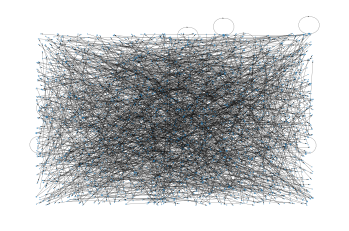

In [ ]:
# Create random layout positions
pos = nx.random_layout(G_reply)

# Create size list
sizes = [x[1] for x in G_reply.degree()]

# Draw the network
nx.draw_networkx(G_reply, pos,
    with_labels = False, 
    node_size = sizes,
    width = 0.2, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

In [ ]:
column_names = ['tweet_id', 'degree_centrality']

In [ ]:
reply_centrality = nx.in_degree_centrality(G_reply)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)
print(reply.sort_values('degree_centrality', ascending = False).head())

          tweet_id  degree_centrality
1744  1.396710e+18           0.001058
1097  1.419900e+18           0.000705
2393  1.369650e+18           0.000705
867   1.423950e+18           0.000705
2836           NaN           0.000353


In [ ]:
df2021_clened.loc[df2021_clened['tweet_id']=='1.396710e+18']

,Column1,publishedDate,tweet_id,text,url,username,user_followerCount,replyCount,retweetCount,likeCount,quoteCount,outlinks,media,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags


# WordCloud

In [ ]:
import pandas as pd

In [ ]:
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/df2019.csv')
df2019.columns

Index(['Unnamed: 0', 'Column1', 'publishedDate', 'tweet_id', 'text',
       'sentiment', 'username', 'user_followerCount', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'outlinks', 'media',
       'quotedTweet', 'mentionedUsers', 'hashtags', 'length', '#hashtag',
       'Day', 'Month', 'Date', 'has_media', 'has_bad_word'],
      dtype='object')

In [ ]:
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/df2021.csv')

In [ ]:
!pip install pythainlp

     |████████████████████████████████| 11.5 MB 3.1 MB/s 


In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

ModuleNotFoundError: ignored

In [ ]:
val = '[KerryExpress, เค อ, หา, รี่, เดี๋ยว, พี่, บ้าน, เพื่อน, แถว บ้าน, ตอน เช้า, ลุง, พ่อ, ขับรถ, เงิน, รถ, จ, ชั้น, ได้ยิน, คุย, เลข แทรค, ค่า, แม่, บอ, หรอ, ทัก, อยู่แล้ว, โมง, ถุง, ฝาก, อี, ปณ, ลูกค้า, เป๊ก, เป๊ก ผลิต, วิตามิน ซี, ก้, ป้า, หนู, เอาจริง, ตตต, สักพัก, อยู่ดี, ต่อไป, มั้ง ,ต่อให้ , วน, คุน, แม่ค้า, ภาษี, พน ง, จังหวัด, ซื้อ, ใส่, ไปรษณีย์ ไทย, ,กก, ไหม, คน, เออ, ไทย, ก้อ, อะ, อ่ะ, ผลิต โชค, เค้า, ศุกร์, ยย, PeckPalitchoke, Thailand Post, flashexpress, หนู, เค อร, tco f, รษณี, ออ, ล่ะ, เ, post, E, >, าาา, า, บอ, D, ผ, Thailandpost, ใบ, คนเดียว, วันอาทิตย์, ส่วนตัว, ทวิ ต, ปีใหม่, ตอนแรก, ตัว, โท, ขาย, บ, บ่าย, เริ่มต้น, สุดท้าย, หอ, เข้าไป, ปี, อิ, kerry, นึง, Q, ประตู, กะ, เจ้า, เด้อ, รูป, ยืน, ขายของ, กา, P, น, เดิม, DHL, ส, ตำบล, สาย, หน้า , วิ่ง, แถว, คุย, เออ, ท, จันทร์, ชั้น, อิ, าา, ย, kerry, โมง, ออ ออ, น, มือ, ทางไปรษณีย์, ก, ว่ะ, ตอนแรก, เรื่อง, ชิ้น, ถุง, เจอ, เหมือน, ใด, อ่าน, แม่ ค้าส่ง, ยาย, เลือก, น้อง, ตรงนี้, สี่]'

In [ ]:
val = val.replace('[','')
val = val.replace(']','')
val = val.split(', ')
val

In [ ]:
thai_stopwords.extend(val)
thai_stopwords

In [ ]:
len(thai_stopwords)
thai_stopwords

In [ ]:
'ไม่' in thai_stopwords

True

In [ ]:
thai_stopwords[-1]

'สี่'

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","&","https"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final
df2019['text_tokens'] = df2019['text'].apply(text_process)
print(df2019['text_tokens'])

0                                       31 # ไปรษณีย์ #ปณ
1       ลืม เขต กุ ห่วย บริการ อย่า # ไปรษณีย์ เลข เช็...
2       มีเรื่อง กรี๊ด ทุ กรอบ บริการ รอบ 23 / 12 / 19...
3       เรียน ซอง นะคะ อย่า พับ จริงอยู่ มีราคา ซอง เอ...
4       ถาม ดี อุดหนุน ไปรษณีย์ ลงทะเบียน 2 - 3 ems 24...
                              ...                        
2610    เก่ง ที่อยู่ ชื่อ ของขวัญ กล่อง บุรุษไปรษณีย์ ...
2611                                   อีกที 😭 # ไปรษณีย์
2612             # ไปรษณีย์ แบบอย่าง ระบุ ไฟลท์ บิน พัสดุ
2613    ประทับใจ ร กก กก กก gt lt อาจารย์ ตอนเช้า ตอนเ...
2614                       กราบ ร เช้า เค อ กก # ไปรษณีย์
Name: text_tokens, Length: 2615, dtype: object


In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","&","https"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final
df2021['text_tokens'] = df2021['text'].apply(text_process)
print(df2021['text_tokens'])

0       ไปรษณีย์ โทร สวัสดี ครับผม บุรุษไปรษณีย์ ผม วา...
1       ไปรษณีย์ อ พนมสารคาม ส่งจดหมาย ใบแจ้งหนี้ 2 เด...
2       หาย ไปรษณีย์ ตุ มาย ที่จะ เสียภาษี คำนวณ ปัญหา...
3       โดน เจาะ กล่อง พัสดุ การเขียน กำกับ เจาะ มารยา...
4       ไปรษณีย์ เล่น กุ จ่าย สำเร็จ สถานะ เอ คอนโด จ่...
                              ...                        
1407    โดน ดอง พัสดุ ฮือ (ลทบ)รอขอ 4 ปกติ 3 🥲😭🥲😭 # ไป...
1408    เหตุการณ์ เจ้าหน้าที่ ไปรษณีย์ เข้ามา ความรับผ...
1409    บ่น ไปรษณีย์ 19 ที่ผ่านมา ของกิน ดู สลิป อ้าว ...
1410    ไอ่ห ยา ทุเรียน # ไปรษณีย์ มาถึง กวน วันที่ 5 ...
1411    ตอน ซอง ใจ แว๊บ 555 กลัว # ไปรษณีย์ ซ้ำรอย เยิ...
Name: text_tokens, Length: 1412, dtype: object


In [ ]:
def count_word(df):
    word_all = " ".join(text for text in df['text_tokens'])
    word_list = word_all.split(" ")
    word_dict = dict()
    for w in word_list:
        if w in word_dict.keys():
            word_dict[w] = word_dict[w] + 1
        else:
            word_dict[w] = 1

    word_count = pd.DataFrame.from_dict(word_dict, orient='index')
    word_count.reset_index(inplace=True)
    word_count.set_axis(['word', 'count'], axis=1, inplace=True)
    word_count.sort_values(by='count', ascending=False, inplace=True)
    
    return word_count

In [ ]:
word_count_df2019 = count_word(df2019)

KeyError: ignored

In [ ]:
word_count_df2021 = count_word(df2021)

In [ ]:
word_count_df['word'].values

array(['ไปรษณีย์', '#', 'โทร', ..., 'แลกเปลี่ยน', 'มมมมมม', 'ดดดดด👍🏻👍🏻👍🏻'],
      dtype=object)

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', None):
    display(word_count_df) #แทน None ด้วย df ที่ต้องการ

,word,count
2,ไปรษณีย์,3482
1,#,3243
142,โทร,545
195,รอ,328
71,จ่าย,315
264,ทำ,308
15,EMS,298
302,​,295
163,งง,292
53,ดี,289


In [ ]:
word_count_df[word_count_df['word'].str.len() > 5]['word'].head(100).values

array(['ไปรษณีย์', 'แบบนี้', 'บริการ', 'วันที่', 'ตอนนี้', 'ลงทะเบียน',
       'ที่อยู่', 'พนักงาน', 'ผู้รับ', 'แต่วัน', 'ติดต่อ', 'ขอบคุณ',
       'ข้างใน', 'อาทิตย์', 'ปลายทาง', 'ปรับปรุง', 'รับผิดชอบ', 'กลับมา',
       'ห่วยแตก', 'แย่มาก', 'เลขที่', 'เสียหาย', 'เอกสาร', 'ประทับใจ',
       'เตรียม', 'ไม่ต้อง', 'เดี๋ยวนี้', 'อัพเดท', 'แล้วก็', 'น่ารัก',
       'สำเร็จ', 'มีปัญหา', 'จดหมาย', 'ตัวเอง', 'ยังอยู่', 'ข้อมูล',
       'ต้นทาง', 'จัดส่ง', 'กระบอก', 'รู้สึก', 'ทั้งวัน', 'อัพเดต',
       'อันนี้', 'คนอื่น', 'หงุดหงิด', 'เหมือนกัน', 'หน้าบ้าน', 'รับสาย',
       'เสียเวลา', 'ดีกว่า', 'เสียเงิน', 'ตรวจสอบ', 'สินค้า', 'กรุงเทพ',
       'อยู่เลย', 'อังคาร', 'ครั้งแรก', 'เข้ามา', 'พรุ่งนี้', 'เรียบร้อย',
       'ใช้เวลา', 'เจ้าหน้าที่', 'อีกแล้ว', 'จำหน่าย', 'ร้องเรียน',
       'บุรุษไปรษณีย์', 'หนังสือ', 'หมู่บ้าน', 'เกินไป', 'แต่เช้า',
       'ออนไลน์', 'ตีกลับ', 'ค้าส่ง', 'รู้จัก', 'สอบถาม', 'สามเสน',
       'วันหยุด', 'ที่ทำงาน', 'ป่านนี้', 'โปสเตอร์', 'เกาหลี', 'เซ็นต์',
       

In [ ]:
from wordcloud import WordCloud, STOPWORDS
pos_word_all = " ".join(text for text in df2019 ['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/DS-project/THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=100, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)

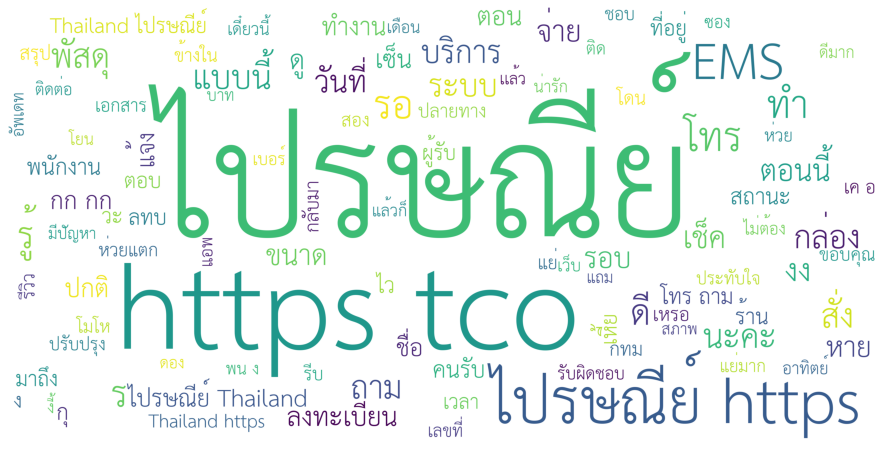

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Time Series

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/twt2019.csv')
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/twt2021.csv')

In [ ]:
df2019.columns

Index(['Column1', 'publishedDate', 'tweet_id', 'text', 'sentiment', 'username',
       'user_followerCount', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'outlinks', 'media', 'quotedTweet', 'mentionedUsers',
       'hashtags'],
      dtype='object')

In [ ]:
df2021.columns

Index(['Column1', 'publishedDate', 'tweet_id', 'text', 'pos_neg', 'username',
       'user_followerCount', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'outlinks', 'media', 'quotedTweet', 'mentionedUsers',
       'hashtags'],
      dtype='object')

In [ ]:
df2019.rename(columns={'sentiment':'pos_neg'}, inplace=True)

In [ ]:
df2019.shape

(2615, 16)

In [ ]:
df2019['pos_neg'].value_counts()

neg    2136
pos     459
Name: pos_neg, dtype: int64

In [ ]:
df2021.shape

(1412, 16)

In [ ]:
df2021['pos_neg'].value_counts()

neg    1324
pos      80
Name: pos_neg, dtype: int64

In [ ]:
g = sns.catplot(x='pos_neg',
                y='')

# Word Tokenize